Student Name : MAURICIO TELES 

Cohort       : COHORT 4 - DIVISADERO

This first Block is to import all the libraries and change the display properties

In [1]:
##############################################################################
# importing libraries
##############################################################################
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear models
import gender_guesser.detector as gender # gender detection
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


##############################################################################
# setting pandas print options - COMMENTED FOR DELIVERY
##############################################################################
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##############################################################################
# define a variable to inform the random_state
##############################################################################
user_random_state = 222

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Read the Apprentice_Chef_Dataset for engineer processing. At the end,
the file is saved as chef_with_all_flags, which was imported to test the models

In [2]:
##############################################################################
# specifying file name
##############################################################################
file = 'Apprentice_Chef_Dataset.xlsx'

##############################################################################
#This reading is not used for the deliverable
#file = 'chef_with_all_flags.xlsx'
##############################################################################

# reading the file into Python
chef = pd.read_excel(file)

Check the dataset for nulls, the columns types, and statistics for each
variable of the dataset

In [3]:
##############################################################################
# Print information about the data to save time and keep the code format
# it's commented
##############################################################################
#print(chef.isnull().sum())
#print(chef.info())
#chef.describe().round(2)

The case mentions a classification based on the user's email. So I decided to check if it would impact my model. At the end, it did.

In [4]:
############################################################################## 
# STEP 1: splitting personal emails
##############################################################################

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

##############################################################################
# STEP 2: concatenating with original DataFrame
##############################################################################
# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']

# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['personal_email_domain']],
                     axis = 1)

##############################################################################
# email domain types
##############################################################################
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', 
                              '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com',
                              '@disney.com', '@dupont.com', '@exxon.com', '@ge.org', '@goldmansacs.com', 
                              '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com', '@jpmorgan.com', 
                              '@mcdonalds.com', '@merck.com', '@microsoft.com', '@nike.com', 
                              '@pfizer.com', '@pg.com', '@travelers.com', '@unitedtech.com', 
                              '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in chef['personal_email_domain']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
        
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')

    else:
            print('Unknown')

# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)

# one hot encoding categorical variables
one_hot_domain_group = pd.get_dummies(chef['domain_group'])

# dropping categorical variables after they've been encoded
chef = chef.drop('domain_group', axis = 1)

# joining codings together
chef = chef.join([one_hot_domain_group])

This section prepares the file for analysis of the data, through correlation and logistic model. It's a raw analysis, so it  only has new features related to the email

In [5]:
##############################################################################
# preparing explanatory variable data for OLS regression
# It allowed the analysis of P-values and coefficients
##############################################################################

chef_data   = chef.drop(['CROSS_SELL_SUCCESS', 'NAME',
                         'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
                         'personal_email_domain'],
                          axis = 1)

# preparing response variable data
chef_target = chef.loc[:, 'CROSS_SELL_SUCCESS']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = user_random_state)



Creates the correlation and its heat map (visual analysis). No strong insights from here.

In [6]:
# Cell commented for delivery purposes
##############################################################################
# correlation heatmap
# this information was created tochef_data support the analysis of the data
##############################################################################
#
# merging training data for statsmodels
#chef_train = pd.concat([X_train, y_train], axis = 1)
#
#df_corr = chef_train.corr().round(2)
#df_corr = df_corr.iloc[0:25, 0:25]
#
#fig, ax = plt.subplots(figsize=(15,15))
#
#sns.heatmap(df_corr,
#            cmap = 'coolwarm',
#            square = True,
#            annot = True,
#            linecolor = 'black',
#            linewidths = 0.5)
#
#plt.show()

In [7]:
##############################################################################
# Formatted the columns to easely code the creation of datasets and model
# commented for delivery
##############################################################################
#for col in chef.columns:
#    print(f"chef_train['{col}'] +")

Build the first logit model with all the numeric variables and print its
summary for analysis.

In [8]:
##############################################################################
# This cell was used to check the model with all the variables
# Commented for the delivery
##############################################################################

# merging training data for statsmodels
#chef_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: build a model
#logistic_full = smf.logit(formula =  """CROSS_SELL_SUCCESS ~
#                                        chef_train['REVENUE'] +
#                                        chef_train['TOTAL_MEALS_ORDERED'] +
#                                        chef_train['UNIQUE_MEALS_PURCH'] +
#                                        chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
#                                        chef_train['PRODUCT_CATEGORIES_VIEWED'] +
#                                        chef_train['AVG_TIME_PER_SITE_VISIT'] +
#                                        chef_train['MOBILE_NUMBER'] +
#                                        chef_train['CANCELLATIONS_BEFORE_NOON'] +
#                                        chef_train['CANCELLATIONS_AFTER_NOON'] +
#                                        chef_train['TASTES_AND_PREFERENCES'] +
#                                        chef_train['MOBILE_LOGINS'] +
#                                        chef_train['PC_LOGINS'] +
#                                        chef_train['WEEKLY_PLAN'] +
#                                        chef_train['EARLY_DELIVERIES'] +
#                                        chef_train['LATE_DELIVERIES'] +
#                                        chef_train['PACKAGE_LOCKER'] +
#                                        chef_train['REFRIGERATED_LOCKER'] +
#                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
#                                        chef_train['AVG_PREP_VID_TIME'] +
#                                        chef_train['LARGEST_ORDER_SIZE'] +
#                                        chef_train['MASTER_CLASSES_ATTENDED'] +
#                                        chef_train['MEDIAN_MEAL_RATING'] +
#                                        chef_train['AVG_CLICKS_PER_VISIT'] +
#                                        chef_train['TOTAL_PHOTOS_VIEWED'] +
#                                        chef_train['junk'] +
#                                        chef_train['personal'] +
#                                        chef_train['professional']""",
#                                        data = chef_train)
#
# Step 2: fit the model based on the data
#results = logistic_full.fit()
#
# Step 3: analyze the summary output
#print(results.summary())

When analyzing the data, the histograms supported the decision the cut offs for each variable, which was used to create binary variables. For the delivery, the graphs will not be plotted and the code will be commented.

In [9]:
# Commented for delivery
##############################################################################
# Visual EDA (Histograms)
##############################################################################
#charcol = ['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 
#           'personal_email_domain']
#
#for col in chef.columns:
#    if col not in charcol:
#        fig, ax = plt.subplots(figsize = (10, 8))
#        sns.distplot(chef[col])                 
#        plt.xlabel(col)

Based on the histograms, heatmap and logit model, I selected some variables to generate others that are binary.

In [10]:
##############################################################################
# setting outlier thresholds
##############################################################################

REVENUE_HI = 2000            # Low / High revenue
TOTAL_MEALS_ORDERED_HI = 100 # Low / High number or meals orderes
UNIQUE_MEALS_PURCH_HI = 5    # Low / High number of unique meals
CONTACTS_W_CUSTOMER_SERVICE_HI = 7  # Low / High number of calls to customer service
AVG_TIME_PER_SITE_VISIT_HI = 130    # Low / High average of site usage
CANCELLATIONS_BEFORE_NOON_HI = 1    # More than 1 cancellation before noon
CANCELLATIONS_AFTER_NOON_HI = 0     # Has cancellations after noon
MOBILE_LOGINS_LO = 5                # Number of mobile logins close to the average
MOBILE_LOGINS_HI = 6                # Number of mobile logins close to the average
PC_LOGINS_LO = 1                    # Number of pc logins close to the average
PC_LOGINS_HI = 2                    # Number of pc logins close to the average
EARLY_DELIVERIES_HI = 0             # Used early deliveries or not
LATE_DELIVERIES_HI = 2              # Used more than 2 late deliveries
FOLLOWED_RECOMMENDATIONS_PCT_HI = 30 # Used over 30% of recommendations
AVG_PREP_VID_TIME_HI = 150          # watched over 150 seconds of video or not
LARGEST_ORDER_SIZE_HI = 4           # has ordered over 4 meals in the same order
MASTER_CLASSES_ATTENDED_HI = 0      # attended master class or not
AVG_CLICKS_PER_VISIT_LO = 12        # clicks per visit close to the average
AVG_CLICKS_PER_VISIT_HI = 15        # clicks per visit close to the average
TOTAL_PHOTOS_VIEWED_HI = 0          # view photos or not

##############################################################################
## Feature Engineering - create flags for intervals for continuous data     ##
##############################################################################
## function to handle the data                                              ##
##############################################################################
def flag_columns (column, hi_cut, low_cut = 0):
    chef['FLAG_'+column] = 0
    condition_hi = chef.loc[0:,'FLAG_'+column][chef[column] > hi_cut]
    condition_lo = chef.loc[0:,'FLAG_'+column][chef[column] < low_cut]
    chef['FLAG_'+column].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)
    chef['FLAG_'+column].replace(to_replace = condition_lo,
                                               value      = 1,
                                               inplace    = True)

##############################################################################
# Create flags
##############################################################################
flag_columns('REVENUE', REVENUE_HI)
flag_columns('TOTAL_MEALS_ORDERED', TOTAL_MEALS_ORDERED_HI)
flag_columns('UNIQUE_MEALS_PURCH', UNIQUE_MEALS_PURCH_HI)
flag_columns('CONTACTS_W_CUSTOMER_SERVICE', CONTACTS_W_CUSTOMER_SERVICE_HI)
flag_columns('AVG_TIME_PER_SITE_VISIT', AVG_TIME_PER_SITE_VISIT_HI)
flag_columns('CANCELLATIONS_BEFORE_NOON', CANCELLATIONS_BEFORE_NOON_HI)
flag_columns('CANCELLATIONS_AFTER_NOON', CANCELLATIONS_AFTER_NOON_HI)
flag_columns('PC_LOGINS', PC_LOGINS_HI, PC_LOGINS_LO)
flag_columns('MOBILE_LOGINS', MOBILE_LOGINS_HI, MOBILE_LOGINS_LO)
flag_columns('EARLY_DELIVERIES', EARLY_DELIVERIES_HI)
flag_columns('LATE_DELIVERIES', LATE_DELIVERIES_HI)
flag_columns('FOLLOWED_RECOMMENDATIONS_PCT', FOLLOWED_RECOMMENDATIONS_PCT_HI)
flag_columns('AVG_PREP_VID_TIME', AVG_PREP_VID_TIME_HI)
flag_columns('LARGEST_ORDER_SIZE', LARGEST_ORDER_SIZE_HI)
flag_columns('MASTER_CLASSES_ATTENDED', MASTER_CLASSES_ATTENDED_HI)
flag_columns('AVG_CLICKS_PER_VISIT', AVG_CLICKS_PER_VISIT_HI, AVG_CLICKS_PER_VISIT_LO)
flag_columns('TOTAL_PHOTOS_VIEWED', TOTAL_PHOTOS_VIEWED_HI)

Variable created to check if the subscription in another service may help in the cross sale.

In [11]:
##############################################################################
# New columns based on independent variables
##############################################################################
# creates a binary variable to identify if the user uses or not weekly plan
# 0 = no / 1 = yes
##############################################################################
chef['FLAG_WEEKLY_PLAN'] = 0
condition = chef.loc[0:,'FLAG_WEEKLY_PLAN'] \
                    [chef['WEEKLY_PLAN'] != 0]

chef['FLAG_WEEKLY_PLAN'].replace(to_replace = condition,
                                 value      = 1,
                                 inplace    = True)

After testing the model with both file, standardized and not, the best model didn't show any difference. Therefore, the file will not be standardized.

In [12]:
##############################################################################
# Create the standardized file to use in linear models
##############################################################################
# INSTANTIATING a StandardScaler() object
#scaler = StandardScaler()
#
# FITTING the scaler with housing_data
#scaler.fit(chef_data)
#
# TRANSFORMING our data after fit
#X_scaled = scaler.transform(chef_data)
#
# converting scaled data into a DataFrame
#X_scaled_df = pd.DataFrame(X_scaled)
#
# checking the results
#X_scaled_df.describe().round(2)
#
#X_scaled_df.columns = chef_data.columns
#
# preparing training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(
#            X_scaled_df,
#            chef_target,
#            test_size = 0.25,
#            random_state = user_random_state)

This session will prepare the file to explore the logit model, starting with all the variables and removing 
those with high p-value.

In [13]:
##############################################################################
# preparing explanatory variable data 
# It allowed the analysis of P-values and coefficients
##############################################################################

chef_data   = chef.drop(['CROSS_SELL_SUCCESS', 'NAME',
                         'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
                         'personal_email_domain'],
                          axis = 1)

# preparing response variable data
chef_target = chef.loc[:, 'CROSS_SELL_SUCCESS']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = user_random_state)

First model created with all columns. It's commented, since the optimized model is built below.

In [14]:
##############################################################################
# This cell was used to refine the formula the variables remained here are
# the ones used for the last model
##############################################################################
#
# merging training data for statsmodels
#chef_train = pd.concat([X_train, y_train], axis = 1)
#
# Step 1: build a model
#logistic_full = smf.logit(formula =  """CROSS_SELL_SUCCESS ~
#                                        chef_train['REVENUE'] +
#                                        chef_train['TOTAL_MEALS_ORDERED'] +
#                                        chef_train['UNIQUE_MEALS_PURCH'] +
#                                        chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
#                                        chef_train['PRODUCT_CATEGORIES_VIEWED'] +
#                                        chef_train['AVG_TIME_PER_SITE_VISIT'] +
#                                        chef_train['MOBILE_NUMBER'] +
#                                        chef_train['CANCELLATIONS_BEFORE_NOON'] +
#                                        chef_train['CANCELLATIONS_AFTER_NOON'] +
#                                        chef_train['TASTES_AND_PREFERENCES'] +
#                                        chef_train['MOBILE_LOGINS'] +
#                                        chef_train['PC_LOGINS'] +
#                                        chef_train['WEEKLY_PLAN'] +
#                                        chef_train['EARLY_DELIVERIES'] +
#                                        chef_train['LATE_DELIVERIES'] +
#                                        chef_train['PACKAGE_LOCKER'] +
#                                        chef_train['REFRIGERATED_LOCKER'] +
#                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
#                                        chef_train['AVG_PREP_VID_TIME'] +
#                                        chef_train['LARGEST_ORDER_SIZE'] +
#                                        chef_train['MASTER_CLASSES_ATTENDED'] +
#                                        chef_train['MEDIAN_MEAL_RATING'] +
#                                        chef_train['AVG_CLICKS_PER_VISIT'] +
#                                        chef_train['TOTAL_PHOTOS_VIEWED'] +
#                                        chef_train['junk'] +
#                                        chef_train['professional'] +
#                                        chef_train['FLAG_REVENUE'] +
#                                        chef_train['FLAG_TOTAL_MEALS_ORDERED'] +
#                                        chef_train['FLAG_UNIQUE_MEALS_PURCH'] +
#                                        chef_train['FLAG_CONTACTS_W_CUSTOMER_SERVICE'] +
#                                        chef_train['FLAG_AVG_TIME_PER_SITE_VISIT'] +
#                                        chef_train['FLAG_CANCELLATIONS_BEFORE_NOON'] +
#                                        chef_train['FLAG_CANCELLATIONS_AFTER_NOON'] +
#                                        chef_train['FLAG_MOBILE_LOGINS'] +
#                                        chef_train['FLAG_PC_LOGINS'] +
#                                        chef_train['FLAG_EARLY_DELIVERIES'] +
#                                        chef_train['FLAG_LATE_DELIVERIES'] +
#                                        chef_train['FLAG_FOLLOWED_RECOMMENDATIONS_PCT'] +
#                                        chef_train['FLAG_AVG_PREP_VID_TIME'] +
#                                        chef_train['FLAG_LARGEST_ORDER_SIZE'] +
#                                        chef_train['FLAG_MASTER_CLASSES_ATTENDED'] +
#                                        chef_train['FLAG_AVG_CLICKS_PER_VISIT'] +
#                                        chef_train['FLAG_TOTAL_PHOTOS_VIEWED'] +
#                                        chef_train['FLAG_WEEKLY_PLAN']""",
#                                        data = chef_train)
#
# Step 2: fit the model based on the data
#results = logistic_full.fit()
#
# Step 3: analyze the summary output
#print(results.summary())

After iterating with the model and removing, one by one, the variables with high p-values, this is the final logit
model.

In [15]:
##############################################################################
# This cell was used to refine the formula the variables remained here are
# the ones used for the last model
##############################################################################

# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: build a model
logistic_sig = smf.logit(formula =  """CROSS_SELL_SUCCESS ~
                                        chef_train['MOBILE_NUMBER'] +
                                        chef_train['TASTES_AND_PREFERENCES'] +
                                        chef_train['PC_LOGINS'] +
                                        chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                        chef_train['junk'] +
                                        chef_train['professional'] +
                                        chef_train['FLAG_CANCELLATIONS_BEFORE_NOON'] +
                                        chef_train['FLAG_CANCELLATIONS_AFTER_NOON']""",
                                        data = chef_train)

# Step 2: fit the model based on the data
results = logistic_sig.fit()

# Step 3: analyze the summary output
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.434745
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3060
Time:                        21:24:53   Log-Likelihood:                -634.29
converged:                       True   LL-Null:                       -913.94
Covariance Type:            nonrobust   LLR p-value:                1.311e-115
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

In this session the file was saved to keep testing models without running all the engineering process.

In [16]:
##############################################################################
# While testing, to save time, the dataframe was saved and used for the 
# next steps. Commented for delivery
##############################################################################
#chef.to_excel("chef_with_all_flags.xlsx",
#                 index = False)

Creates a dictionary with the all an entry for all the variables and another one with only the significant ones.

In [17]:
##############################################################################
# Creates the dictionary
##############################################################################
candidate_dict = {

 # full model
 'logit_full'   : [ 'REVENUE',
                    'TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH',
                    'CONTACTS_W_CUSTOMER_SERVICE',
                    'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT',
                    'MOBILE_NUMBER',
                    'CANCELLATIONS_BEFORE_NOON',
                    'CANCELLATIONS_AFTER_NOON',
                    'TASTES_AND_PREFERENCES',
                    'MOBILE_LOGINS',
                    'PC_LOGINS',
                    'WEEKLY_PLAN',
                    'EARLY_DELIVERIES',
                    'LATE_DELIVERIES',
                    'PACKAGE_LOCKER',
                    'REFRIGERATED_LOCKER',
                    'FOLLOWED_RECOMMENDATIONS_PCT',
                    'AVG_PREP_VID_TIME',
                    'LARGEST_ORDER_SIZE',
                    'MASTER_CLASSES_ATTENDED',
                    'MEDIAN_MEAL_RATING',
                    'AVG_CLICKS_PER_VISIT',
                    'TOTAL_PHOTOS_VIEWED',
                    'junk',
                    'personal',
                    'professional',
                    'FLAG_REVENUE',
                    'FLAG_TOTAL_MEALS_ORDERED',
                    'FLAG_UNIQUE_MEALS_PURCH',
                    'FLAG_CONTACTS_W_CUSTOMER_SERVICE',
                    'FLAG_AVG_TIME_PER_SITE_VISIT',
                    'FLAG_CANCELLATIONS_BEFORE_NOON',
                    'FLAG_CANCELLATIONS_AFTER_NOON',
                    'FLAG_MOBILE_LOGINS',
                    'FLAG_PC_LOGINS',
                    'FLAG_EARLY_DELIVERIES',
                    'FLAG_LATE_DELIVERIES',
                    'FLAG_FOLLOWED_RECOMMENDATIONS_PCT',
                    'FLAG_AVG_PREP_VID_TIME',
                    'FLAG_LARGEST_ORDER_SIZE',
                    'FLAG_MASTER_CLASSES_ATTENDED',
                    'FLAG_AVG_CLICKS_PER_VISIT',
                    'FLAG_TOTAL_PHOTOS_VIEWED',
                    'FLAG_WEEKLY_PLAN'],
 
 # significant variables only
 'logit_sig'    : ['MOBILE_NUMBER',
                    'TASTES_AND_PREFERENCES',
                    'PC_LOGINS',
                    'FOLLOWED_RECOMMENDATIONS_PCT',
                    'junk',
                    'professional',
                    'FLAG_CANCELLATIONS_BEFORE_NOON',
                    'FLAG_CANCELLATIONS_AFTER_NOON']

}

In [18]:
##############################################################################
# Prepare the dataframe with the significant variables to run with the models
##############################################################################

chef_data   = chef.loc[ : , candidate_dict['logit_sig']]

# preparing response variable data
chef_target = chef.loc[:, 'CROSS_SELL_SUCCESS']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = user_random_state)

total_performance is a dataframe used to store the score of each model. After calling the function
 exec_model, the caller can add a new row to it

In [19]:
##############################################################################
# (Re)Creates a dataframe with the result of each run of each model
##############################################################################
total_performance = pd.DataFrame(columns=['Model', 'Training', 'Testing', 
                                          'AUC', 'CMatrix'])

To make it easier to run the models, exec_model receives the name and an instance of 
the model, returning an dataframe with the model and its scores
The following cells will call the function with some linear models

In [20]:
##############################################################################
# It receives the model's name and an instance of the model to:
# - fit
# - predict
# - score
# Returns a dataframe with the score of the model that may be added to the 
# total_performance dataframe
##############################################################################
def exec_model(modelo='Linear Regression', mod=sklearn.linear_model.LinearRegression()):
    # FITTING to the training data
    mod_fit = mod.fit(X_train, y_train)

    # PREDICTING on new data
    mod_pred = mod_fit.predict(X_test)

    mod_score_train = mod.score(X_train, y_train).round(4)
    mod_score_test  = mod.score(X_test, y_test).round(4)
    mod_auc_score   = roc_auc_score(y_true  = y_test, y_score = mod_pred).round(4)
##############################################################################
# Print the confusion matrix of the model
##############################################################################
    mod_con_matrix = confusion_matrix(y_true = y_test, y_pred = mod_pred)

    return pd.DataFrame({'Model'    : [modelo],
                         'Training' : [mod_score_train],
                         'Testing'  : [mod_score_test],
                         'AUC'      : [mod_auc_score],
                         'CMatrix'  : [mod_con_matrix]})

This cell constains functions provided by Prof. Chase to draw the tree and the
importance of the features.

In [21]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [22]:
##############################################################################
# INSTANTIATING a logistic regression model object
##############################################################################
modelo = 'Logistic Regression'
mod = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = user_random_state)

# concatenating with former performance DataFrame
total_performance = pd.concat([total_performance, exec_model(modelo,mod)],
                              axis = 0)

In [23]:
##############################################################################
# INSTANTIATING a KNN model object
##############################################################################
modelo = 'KNN'
mod = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)

# concatenating with former performance DataFrame
total_performance = pd.concat([total_performance, exec_model(modelo,mod)],
                              axis = 0)

In [24]:
##############################################################################
# INSTANTIATING a Tree model object with no prune limit
# This cell is commented, since the analysis showed that the prune tree 
# performs better than this
##############################################################################
#modelo = 'Tree'
#mod = DecisionTreeClassifier()
#
# concatenating with former performance DataFrame
#total_performance = pd.concat([total_performance, exec_model(modelo,mod)],
#                              axis = 0)
#
# plotting feature importance
#plot_feature_importances(mod,
#                         train = X_train,
#                         export = False)
#
# calling display_tree
#display_tree(tree       = mod,
#             feature_df = X_train)

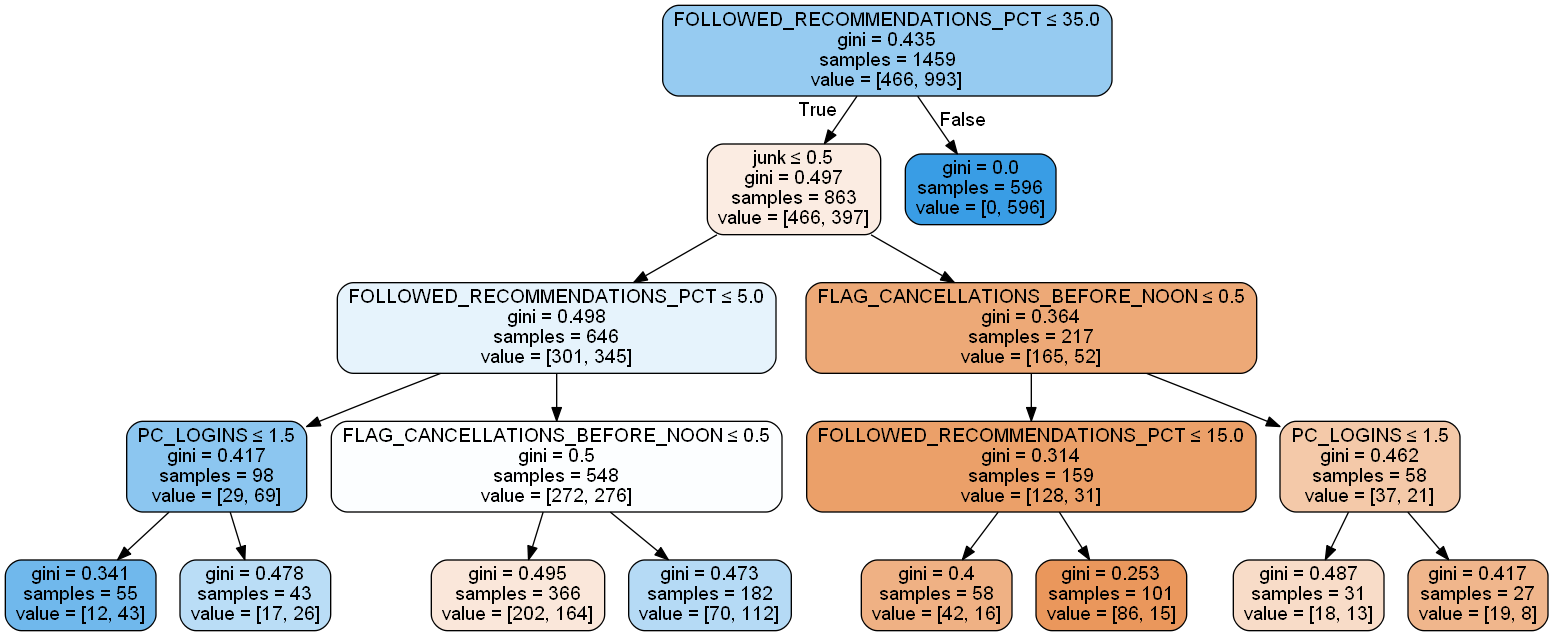

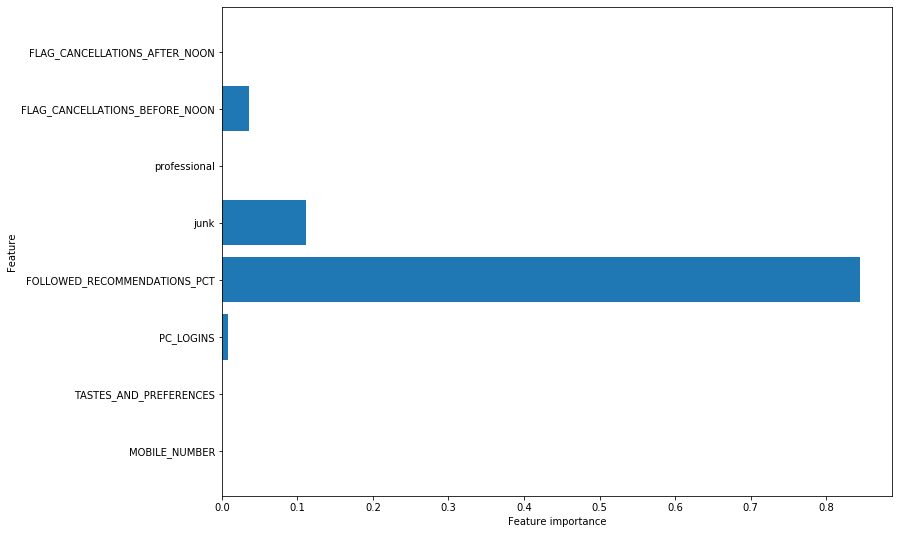

In [25]:
##############################################################################
# INSTANTIATING a LINEAR REGRESSION model object
##############################################################################
modelo = 'Pruned Tree'
mod = DecisionTreeClassifier(max_depth = 4,
                              min_samples_leaf = 25,
                              random_state = user_random_state)


# concatenating with former performance DataFrame
total_performance = pd.concat([total_performance, exec_model(modelo,mod)],
                              axis = 0)

# plotting feature importance
plot_feature_importances(mod,
                         train = X_train,
                         export = False)

# calling display_tree
display_tree(tree       = mod,
             feature_df = X_train)



In [26]:
##############################################################################
# INSTANTIATING a LINEAR REGRESSION model object
##############################################################################
modelo = 'Random Forest'
mod = RandomForestClassifier(n_estimators=200)

# concatenating with former performance DataFrame
total_performance = pd.concat([total_performance, exec_model(modelo,mod)],
                              axis = 0)

In [27]:
##############################################################################
# INSTANTIATING a LINEAR REGRESSION model object
##############################################################################
modelo = 'Gradient Boosting'
mod = GradientBoostingClassifier(loss          = 'deviance',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = user_random_state)

# concatenating with former performance DataFrame
total_performance = pd.concat([total_performance, exec_model(modelo,mod)],
                              axis = 0)

Print the total_performance dataframe to compare the result of each model

In [28]:
##############################################################################
# Sort the dataframe by its testing performance and print it
##############################################################################
total_performance = total_performance.sort_values(by = 'AUC',
                                                  ascending = False)

total_performance

,Model,Training,Testing,AUC,CMatrix
0,Gradient Boosting,0.8211,0.8214,0.7928,"[[113, 46], [41, 287]]"
0,Pruned Tree,0.7841,0.7926,0.7909,"[[125, 34], [67, 261]]"
0,Random Forest,0.8465,0.7967,0.7778,"[[115, 44], [55, 273]]"
0,Logistic Regression,0.7629,0.7598,0.7179,"[[95, 64], [53, 275]]"
0,KNN,0.1077,-0.1112,0.7019,"[[87, 72], [47, 281]]"


Due to the importance of FOLLOWED_RECOMMENDATIONS_PCT in the model, I decided to study how the other variables
impact it. Since there is an intersection between the independent variables that predicts CROSS_SELL_SUCCESS and a binary variable saying the willingness to follow recommendations, I stopped and kept the ones I had.

In [29]:
##############################################################################
# preparing explanatory variable data for OLS regression
# It allowed the analysis of P-values and coefficients
##############################################################################
#
#chef_data   = chef.drop(['CROSS_SELL_SUCCESS', 'NAME',
#                         'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
#                         'personal_email_domain',
#                         'FLAG_FOLLOWED_RECOMMENDATIONS_PCT'],
#                          axis = 1)
#
# preparing response variable data
#chef_target = chef.loc[:, 'FLAG_FOLLOWED_RECOMMENDATIONS_PCT']
#
#
# preparing training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(
#            chef_data,
#            chef_target,
#            test_size = 0.25,
#            random_state = user_random_state)
#
##############################################################################
# This cell was used to refine the formula the variables remained here are
# the ones used for the last model
##############################################################################
#
# merging training data for statsmodels
#chef_train = pd.concat([X_train, y_train], axis = 1)
#
# Step 1: build a model
#logistic_full = smf.logit(formula =  """FLAG_FOLLOWED_RECOMMENDATIONS_PCT ~
#                                        chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
#                                        chef_train['MOBILE_NUMBER'] +
#                                        chef_train['junk'] +
#                                        chef_train['FLAG_REVENUE'] +
#                                        chef_train['FLAG_CANCELLATIONS_BEFORE_NOON'] +
#                                        chef_train['FLAG_CANCELLATIONS_AFTER_NOON'] +
#                                        chef_train['FLAG_MASTER_CLASSES_ATTENDED']
#                                        """,
#                                        data = chef_train)
#
# Step 2: fit the model based on the data
#results = logistic_full.fit()
#
# Step 3: analyze the summary output
#print(results.summary())

After try some combinations and measure both performance and time, I decided to built the final model with the gradient boosting. It performed better at AUC, and the number of true positives is also higher than the other models.